<a href="https://colab.research.google.com/github/dsgaldino/Metodos_Analiticos_Redes_Sociais/blob/main/e_coli_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarefa Final

## Métodos Analíticos para Redes Sociais

***Aluno:*** Diego Soares Galdino

***Prof.:*** Marcelo de Oliveira Rosa


### Bibiliotecas

In [38]:
install.packages("igraph")
library(igraph)

install.packages("rgl")
library(rgl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



### Rede complexa de transcrição das interações entre operões no organismo E. coli

In [113]:
# Leitura da Rede
e_coli <- read_graph('e_coli.net', 'ncol')

# Leitura das informações dos Nós
e_coli_nodes <- read.table('e_coli_nodes.txt')

In [114]:
# Cópias da rede e dos nós
arch_copy <- e_coli
nodes_copy <- e_coli_nodes

# Nomes dos nós na cópia da rede
f <- function(x) nodes_copy$V2[match(x, nodes_copy$V1)]
res <- sapply(V(arch_copy), f)
V(arch_copy)$name <- res

In [115]:
  slabel <- NA #sem_label
  vsize <- 6

## Respostas

### 1. Qual a representação adotada?

    a. Que dados foram considerados como nós, arestas, pesos, e por quê?

In [116]:
summary(arch_copy)

print(arch_copy)

# Número de vértices
num_vertices <- vcount(arch_copy)
print(paste("Número de vértices:", num_vertices))

# Número de arestas
num_arestas <- ecount(arch_copy)
print(paste("Número de arestas:", num_arestas))

IGRAPH a31570e UNW- 419 519 -- 
+ attr: name (v/c), weight (e/n)
IGRAPH a31570e UNW- 419 519 -- 
+ attr: name (v/c), weight (e/n)
+ edges from a31570e (vertex names):
 [1] acnA     --acrAB           acrR     --acs            
 [3] acrR     --ada_alkB        adhE     --adiA           
 [5] adiA_adiY--ahpCF           aidB     --alaWX          
 [7] aldB     --alkA            aldB     --alpA           
 [9] aldB     --ansB            aldB     --appCBA         
[11] appY     --araBAD          alaWX    --appY           
[13] aidB     --appY            appY     --araC           
[15] appY     --araE            appY     --araFG_araH_1H_2
+ ... omitted several edges
[1] "Número de vértices: 419"
[1] "Número de arestas: 519"


In [117]:
# Obteção pares de nós conectados por arestas
edge_pairs <- ends(arch_copy, E(arch_copy))

# Cálculo do grau para cada nó
grau <- degree(arch_copy)

# Cálculo do coeficiente de clusterização para cada nó
coeficiente_clusterizacao <- transitivity(arch_copy, type = "weighted")

# Verificação as arestas únicas (nomes)
unique_edge_names <- unique(E(arch_copy)$name)

# Verificação os pesos das arestas únicas
unique_edge_weights <- unique(E(arch_copy)$weight)

In [118]:
# Nós
cat("\nPares de nós conectados por arestas:\n")
print(head(edge_pairs))

cat("\nGrau de cada nó:\n")
print(head(grau))

cat("\nCoeficiente de clusterização para cada nó:\n")
print(head(coeficiente_clusterizacao))

# Arestas
num_arestas <- ecount(arch_copy)
print(paste("Número de arestas:", num_arestas))

cat("\nArestas únicas (nomes):\n")
print(unique_edge_names)

cat("\nPesos das arestas únicas:\n")
print(unique_edge_weights)

# Número de vértices
num_vertices <- vcount(arch_copy)

print(paste("Número de vértices:", num_vertices))


Pares de nós conectados por arestas:
     [,1]        [,2]      
[1,] "acnA"      "acrAB"   
[2,] "acrR"      "acs"     
[3,] "acrR"      "ada_alkB"
[4,] "adhE"      "adiA"    
[5,] "adiA_adiY" "ahpCF"   
[6,] "aidB"      "alaWX"   

Grau de cada nó:
    acnA    acrAB     acrR      acs ada_alkB     adhE 
       1        1        2        1        2        1 

Coeficiente de clusterização para cada nó:
[1] NaN NaN   0 NaN   0 NaN
[1] "Número de arestas: 519"

Arestas únicas (nomes):
NULL

Pesos das arestas únicas:
[1] 2 1 3
[1] "Número de vértices: 419"


### 2 - Qual a melhor forma de visualizar a rede complexa?
    a. Usar layouts diferentes para melhor visualizar a conectividade dos nós

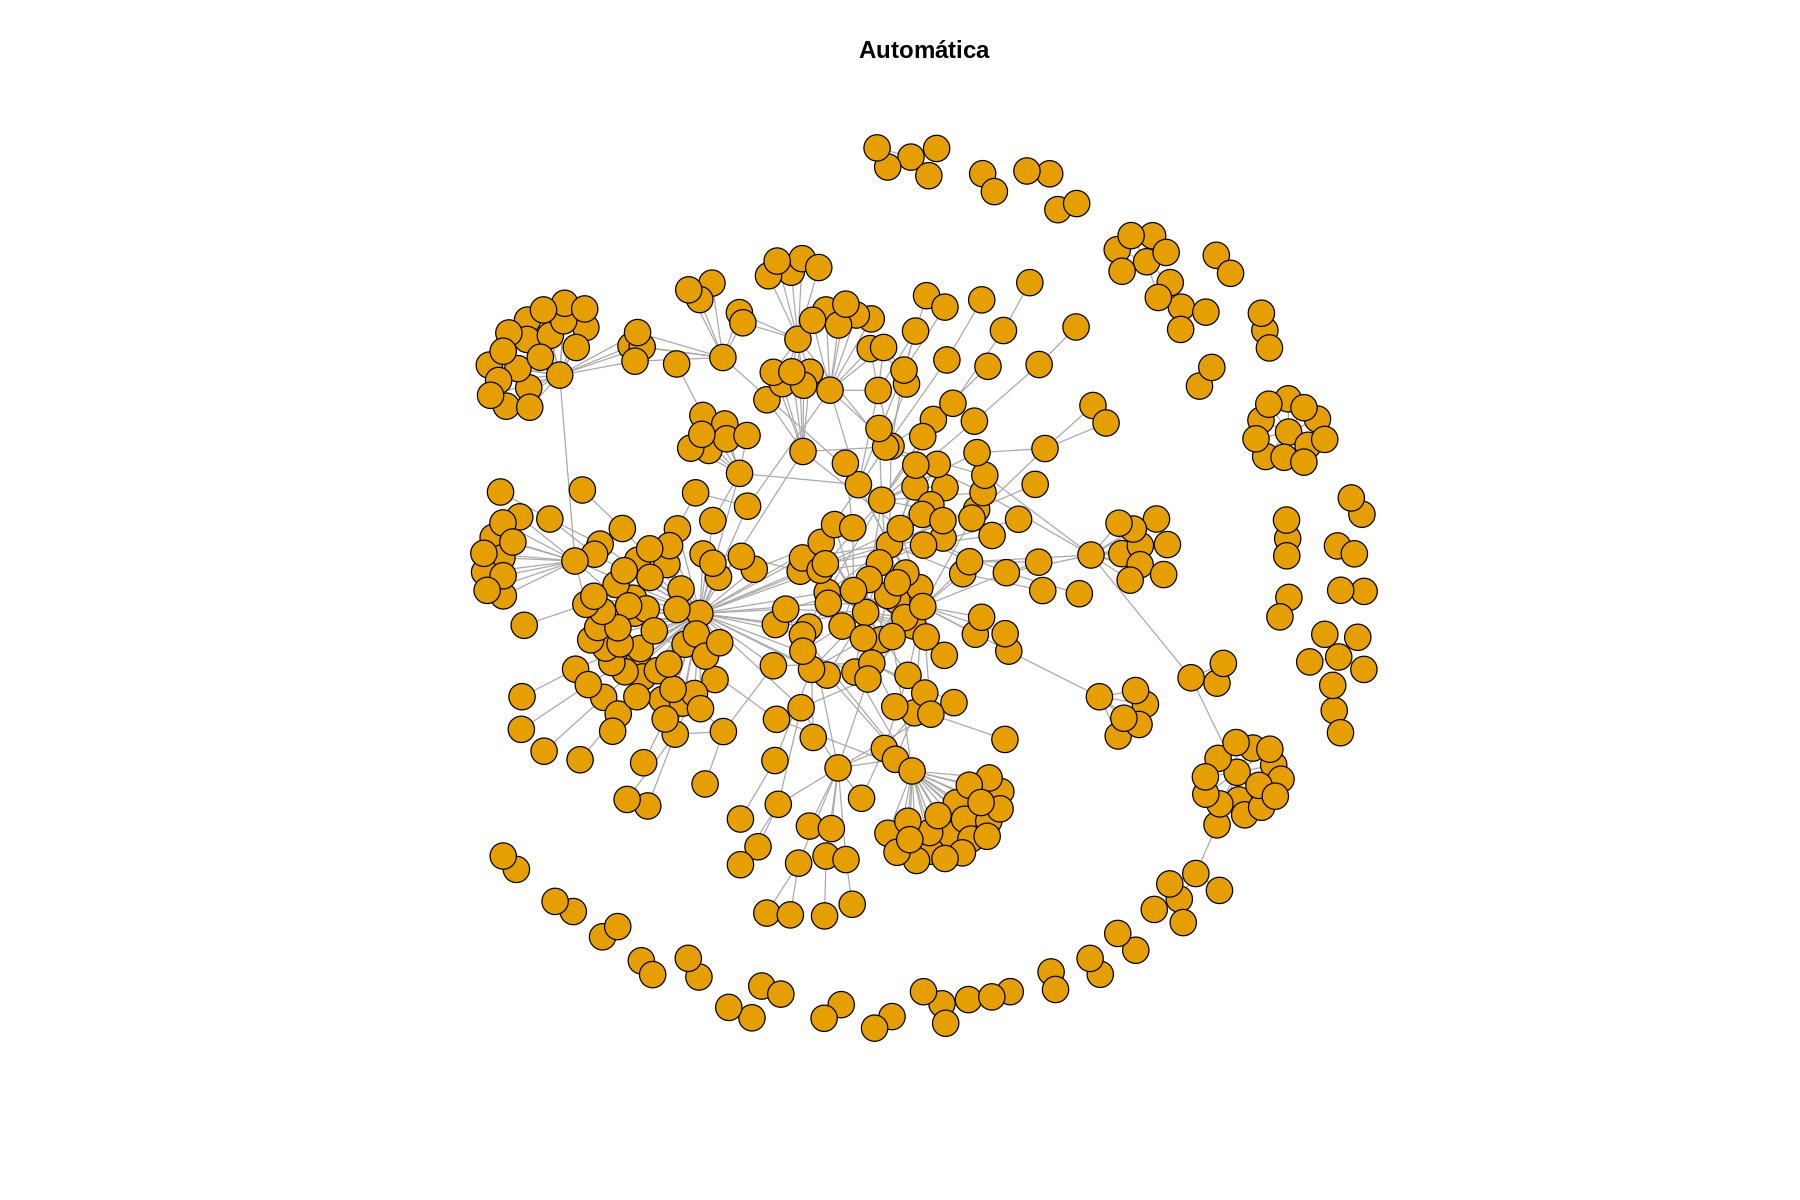

In [121]:
# Visualização primária

# Tamanho das figuras (ajuste conforme necessário)
options(repr.plot.width = 15, repr.plot.height = 10)

plot(arch_copy, layout = layout.auto, vertex.label=slabel, vertex.size=vsize, , main = "Automática")

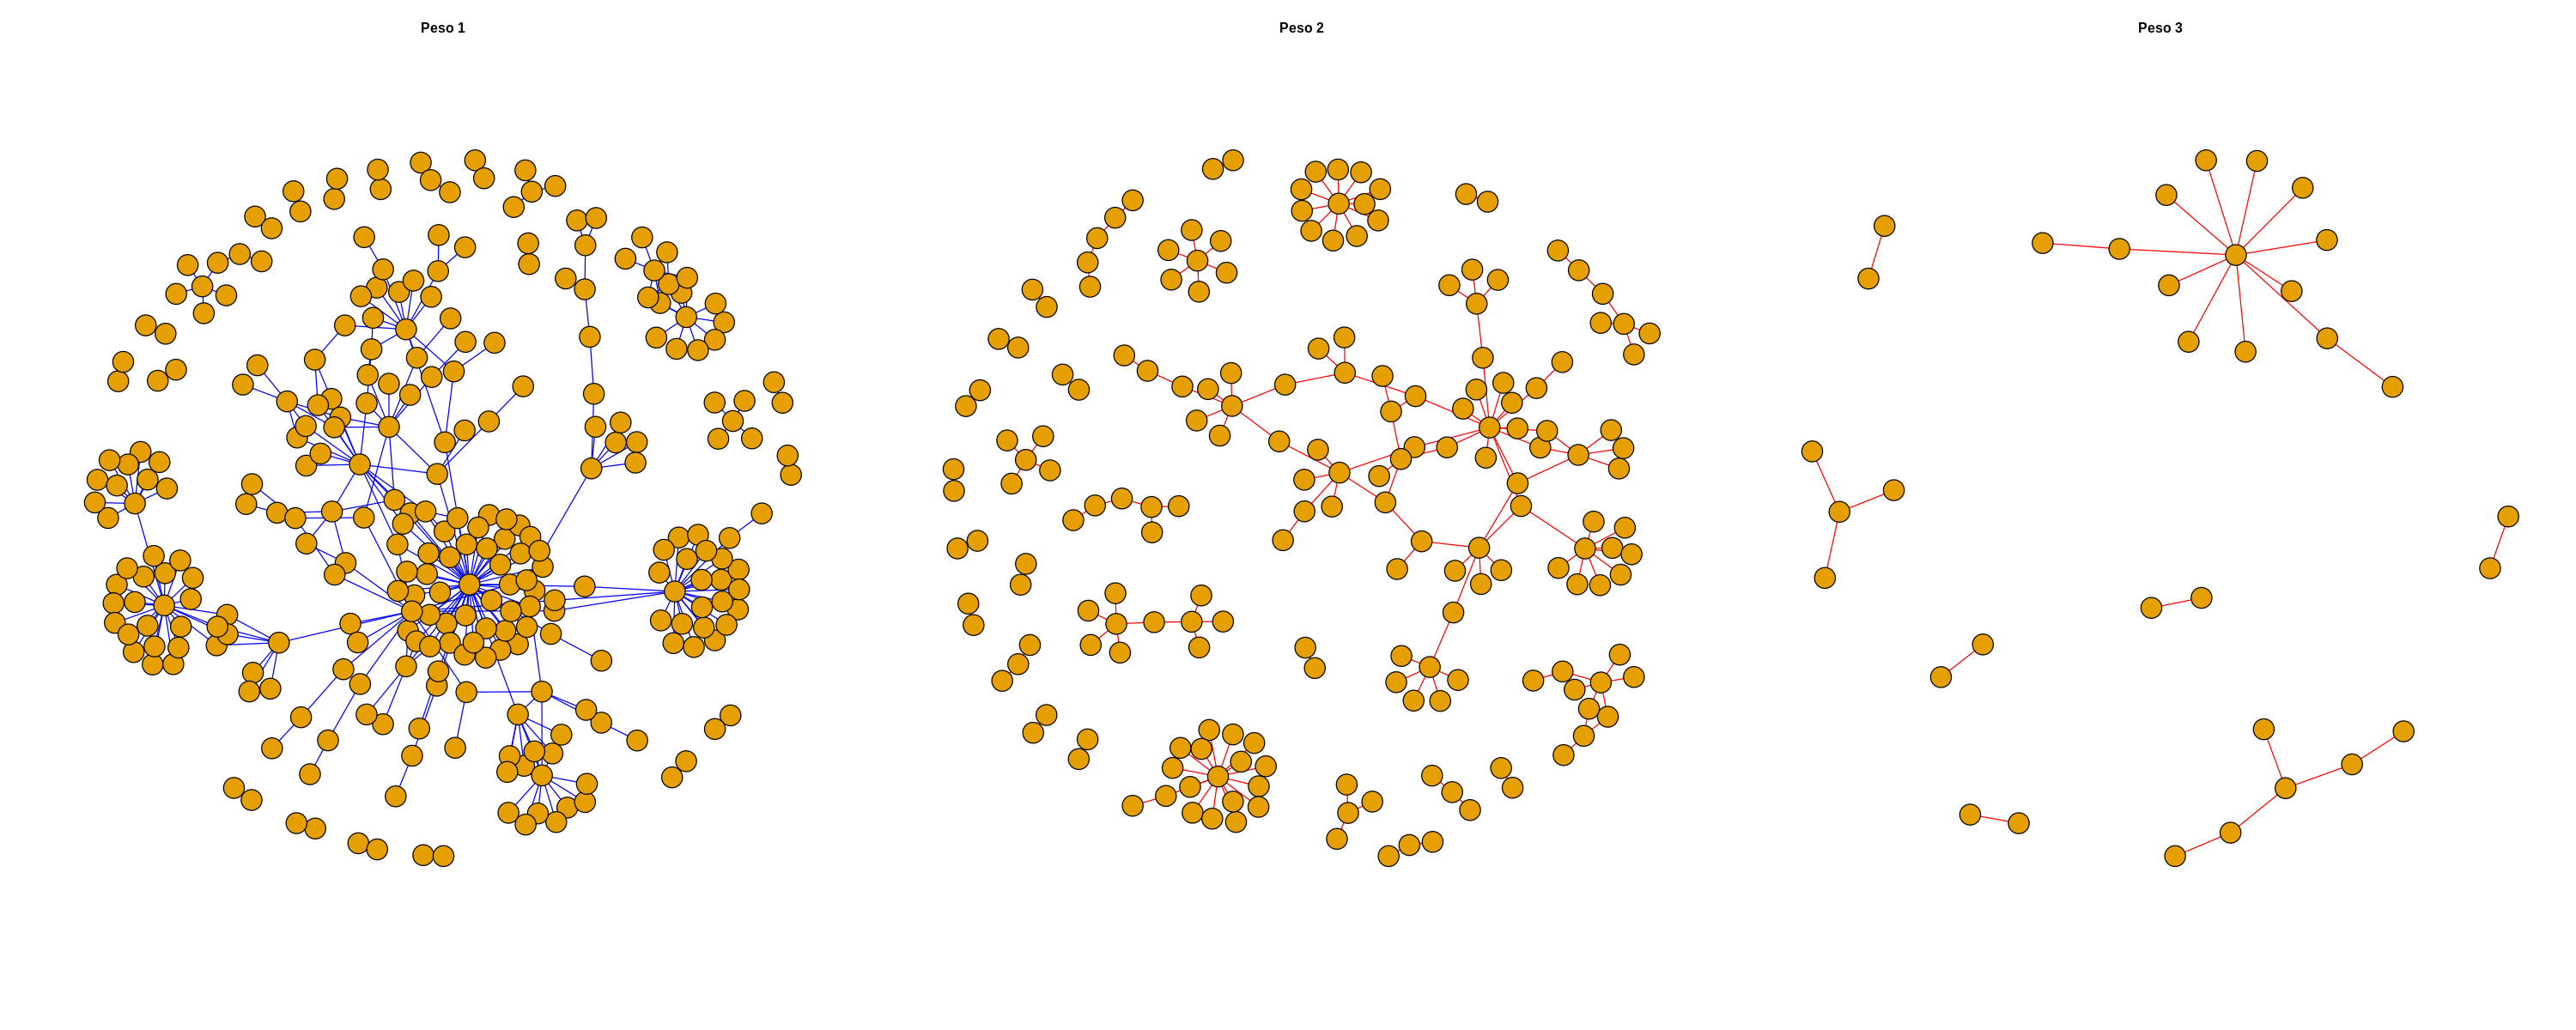

In [107]:
# Define a matriz de plotagem 1x3 para os gráficos lado a lado
par(mfrow = c(1, 3))

# Tamanho das figuras (ajuste conforme necessário)
options(repr.plot.width = 25, repr.plot.height = 10)

E(arch_copy)$color <- ifelse(E(arch_copy)$weight > 1, 'red', ifelse(E(arch_copy)$weight == 2, 'green', 'blue'))

arch1 <- subgraph.edges(arch_copy, which(E(arch_copy)$weight == 1), delete.vertices = TRUE)
arch2 <- subgraph.edges(arch_copy, which(E(arch_copy)$weight == 2), delete.vertices = TRUE)
arch3 <- subgraph.edges(arch_copy, which(E(arch_copy)$weight == 3), delete.vertices = TRUE)

# Define os títulos com base no peso das arestas
title1 <- paste("Peso 1")
title2 <- paste("Peso 2")
title3 <- paste("Peso 3")

plot(arch1, layout = layout.auto, vertex.label = slabel, vertex.size = vsize, main = title1)
plot(arch2, layout = layout.auto, vertex.label = slabel, vertex.size = vsize, main = title2)
plot(arch3, layout = layout.auto, vertex.label = slabel, vertex.size = vsize, main = title3)

par(mfrow = c(1, 1))  # Retorna à matriz de plotagem padrão (1x1)



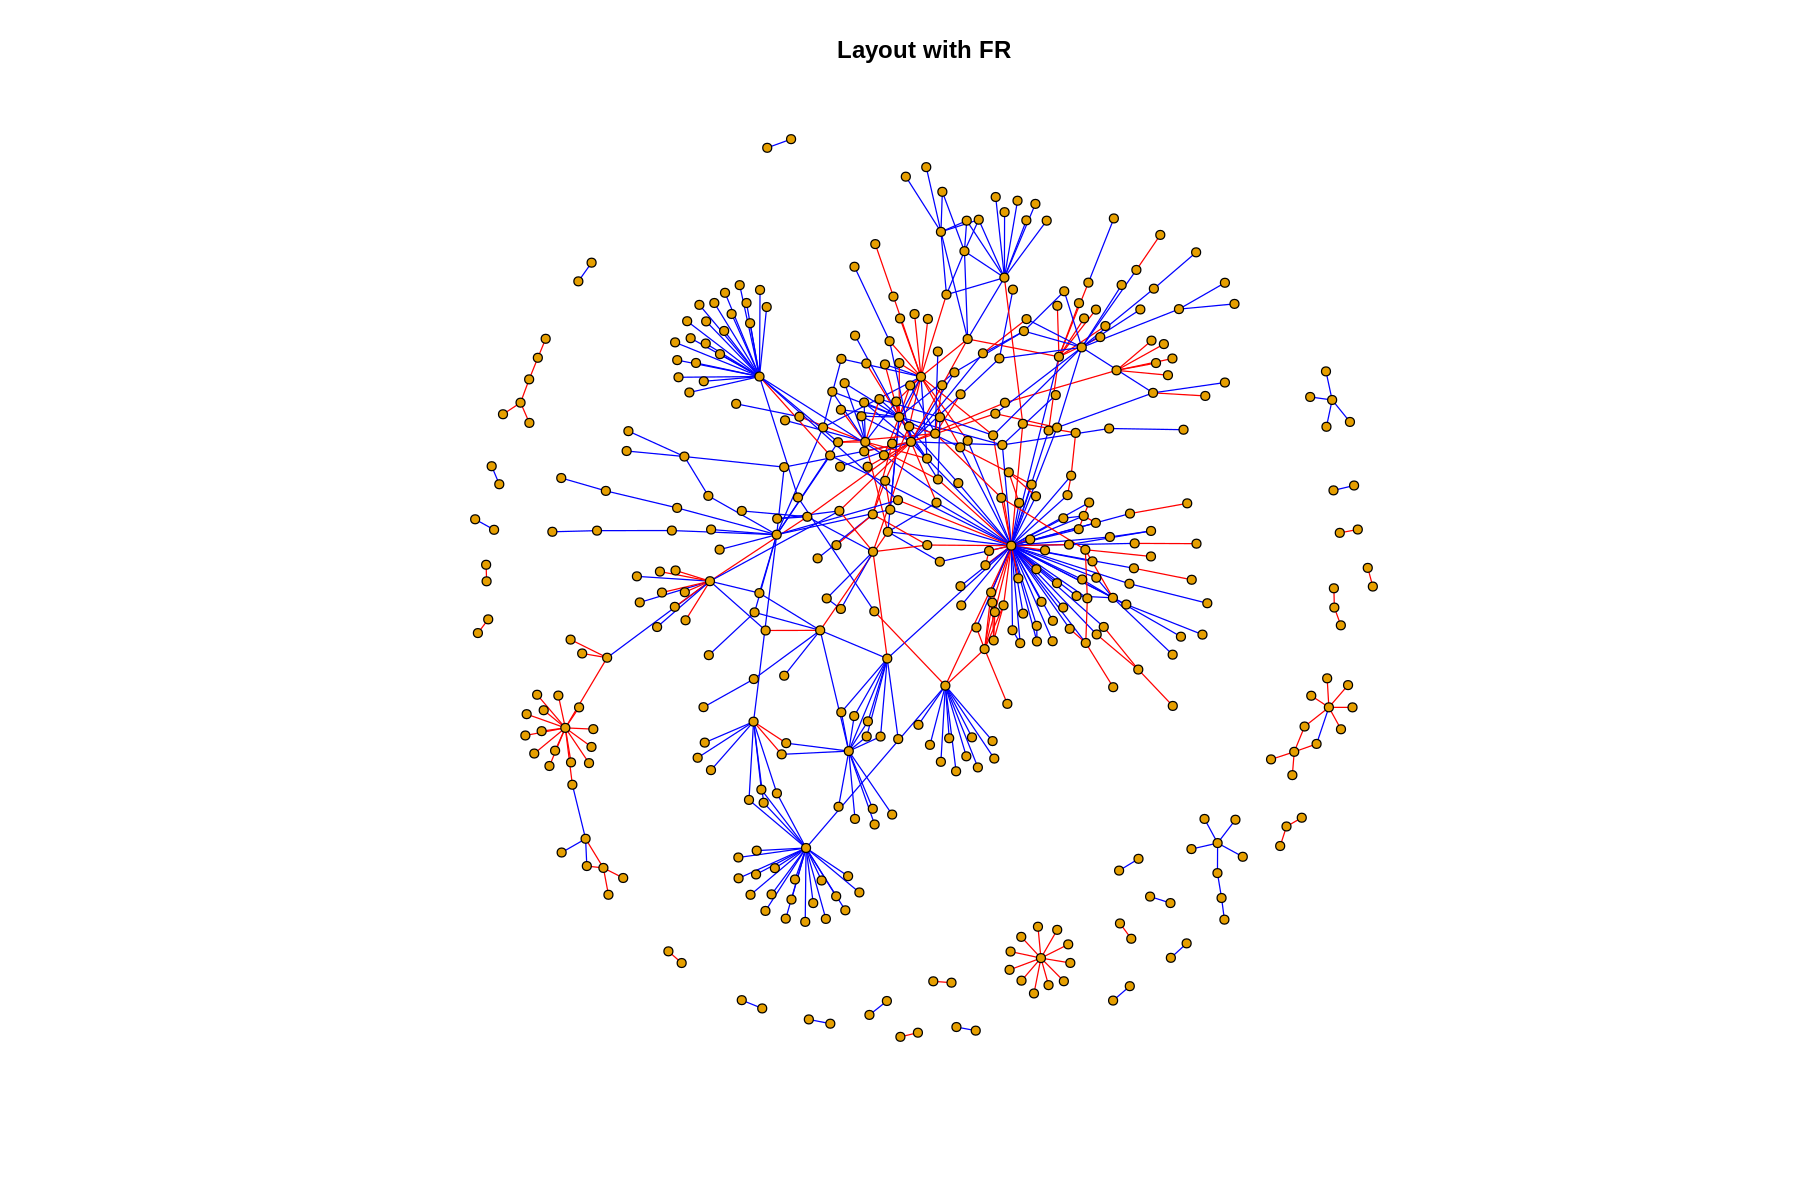

In [108]:
# Definção do tamanho dos vértices como 2
V(arch_copy)$size <- 2

# Tamanho das figuras (ajuste conforme necessário)
options(repr.plot.width = 15, repr.plot.height = 10)

# Ajuste do layout usando "layout with fr"
plot(arch_copy, layout = layout_with_fr(arch_copy), vertex.label = NA, main = "Layout with FR")

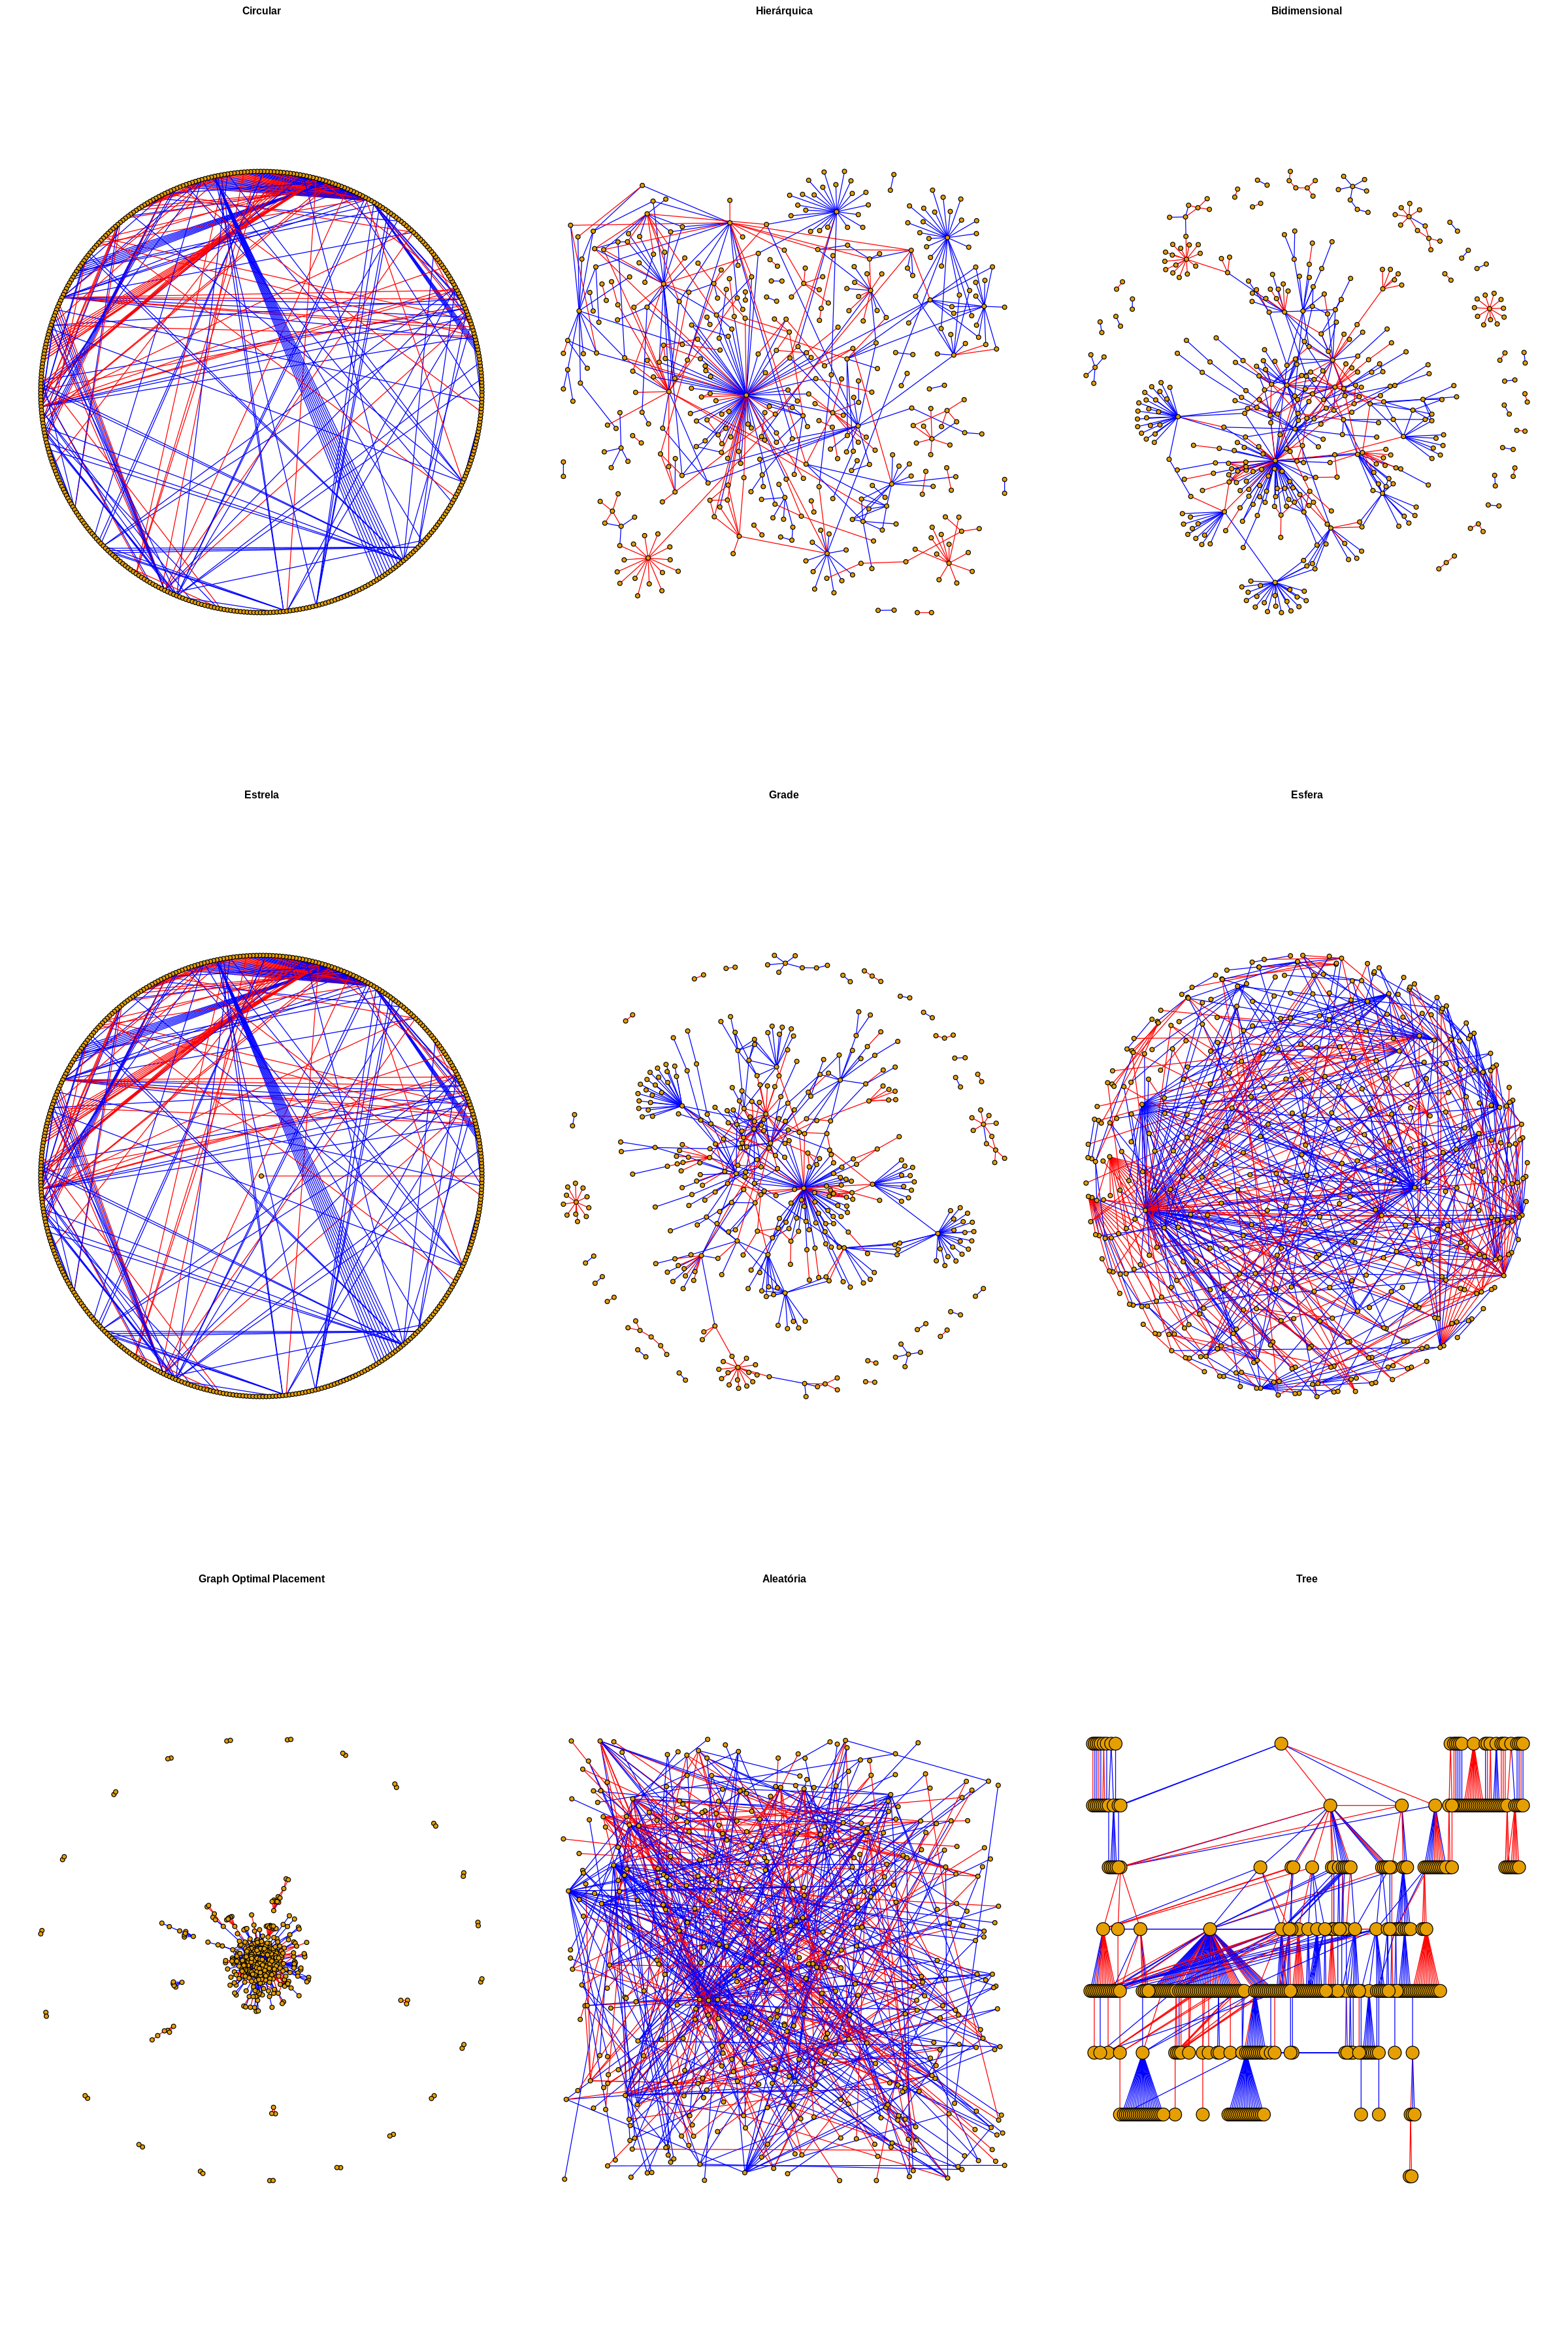

In [111]:
# Definção do layout de plotagem como uma matriz de 3x3 e ajuste o tamanho das figuras
par(mfrow = c(3, 3), mar = c(2, 2, 2, 2))

# Tamanho das figuras
options(repr.plot.width = 20, repr.plot.height = 30)

# Representação Circular
plot(arch_copy, layout = layout_in_circle(arch_copy), vertex.label = NA, main = "Circular")

# Representação Hierárquica
plot(arch_copy, layout = layout_with_dh(arch_copy), vertex.label = NA, main = "Hierárquica")

# Representação Bidimensional (Default)
plot(arch_copy, layout = layout_with_fr(arch_copy), vertex.label = NA, main = "Bidimensional")

# Representação em Estrela (destacando um nó central)
central_node <- V(arch_copy)[1]
plot(arch_copy, layout = layout_as_star(arch_copy, center = central_node), vertex.label = NA, main = "Estrela")

# Representação em Grade
plot(arch_copy, layout = layout_nicely(arch_copy), vertex.label = NA, main = "Grade")

# Representação em Esfera
plot.igraph(arch_copy, layout = layout_on_sphere(arch_copy), vertex.label = NA, main = "Esfera")

# Representação Graph Optimal Placement
plot(arch_copy, layout = layout_with_gem(arch_copy), vertex.label = NA, main = "Graph Optimal Placement")


set.seed(123)  # Semente para reproducibilidade
plot(arch_copy, layout = layout_randomly(arch_copy), vertex.label = NA, main = "Aleatória")

# Representação Tree
plot(arch_copy, layout = layout_as_tree, vertex.label=slabel, vertex.size=vsize, main = "Tree")

# Redefinição d layout de plotagem para o padrão (1x1) para futuras visualizações
par(mfrow = c(1, 1), mar = c(5.1, 4.1, 4.1, 2.1))
options(repr.plot.width = 6, repr.plot.height = 4)


### 3. Qual a distribuição de valores das seguintes métricas:
    a. Grau/grau ponderado
    b. Caminho/caminho ponderado
    c. Coeficiente de clusterização (transitividade) (com ou sem peso)


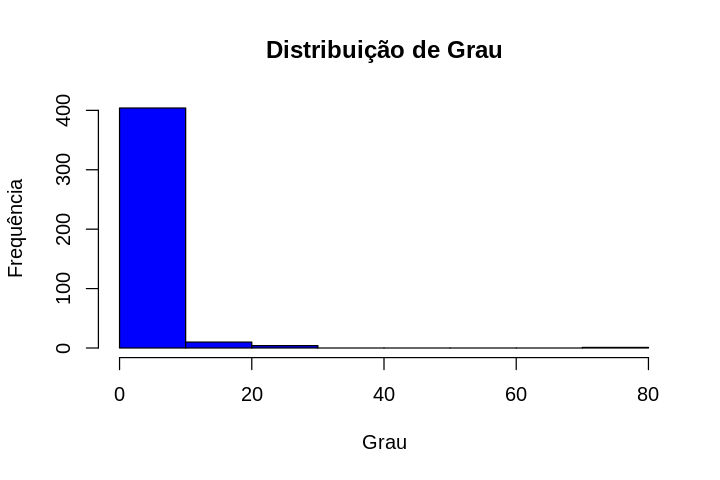

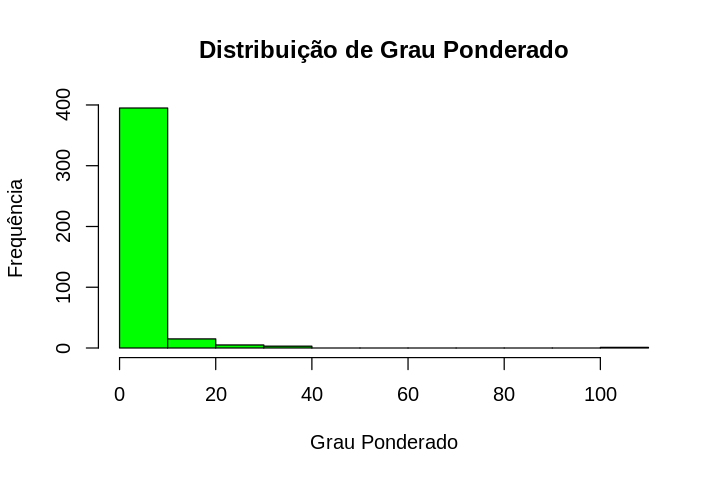

In [53]:
# Cálculo do grau para cada nó
grau <- degree(arch_copy)

# Cálculo do grau ponderado para cada nó
grau_ponderado <- strength(arch_copy)

# Visualização a distribuição de grau
hist(grau, main = "Distribuição de Grau", xlab = "Grau", ylab = "Frequência", col = "blue")

# Visualização a distribuição de grau ponderado
hist(grau_ponderado, main = "Distribuição de Grau Ponderado", xlab = "Grau Ponderado", ylab = "Frequência", col = "green")

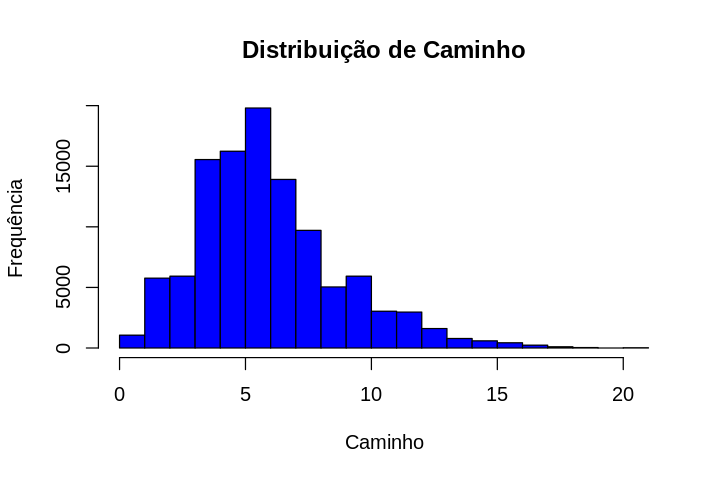

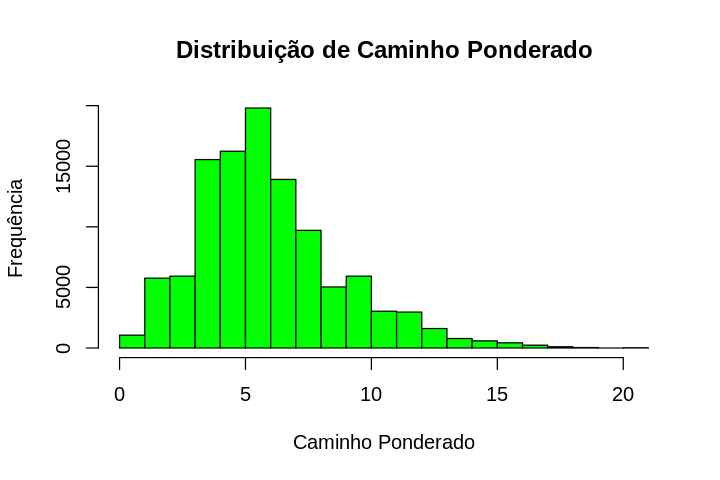

In [54]:
# Cálculo do caminho mais curto entre dois nós (caminho não ponderado)
caminho <- shortest.paths(arch_copy, mode = "all")

# Cálculo do caminho mais curto ponderado entre dois nós
caminho_ponderado <- shortest.paths(arch_copy, mode = "all", weights = E(arch_copy)$weight)

# Remoção valores infinitos e NaNs dos caminhos mínimos
caminho <- caminho[is.finite(caminho)]
caminho_ponderado <- caminho_ponderado[is.finite(caminho_ponderado)]

# Visualização a distribuição de caminho
hist(caminho, main = "Distribuição de Caminho", xlab = "Caminho", ylab = "Frequência", col = "blue")

# Visualização a distribuição de caminho ponderado
hist(caminho_ponderado, main = "Distribuição de Caminho Ponderado", xlab = "Caminho Ponderado", ylab = "Frequência", col = "green")

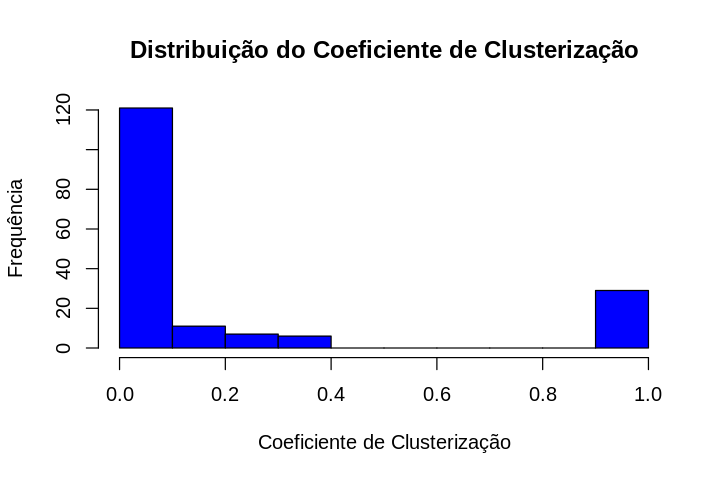

In [55]:
# Cálculo do coeficiente de clusterização para cada nó (com pesos nas arestas)
coeficiente_clusterizacao <- transitivity(arch_copy, type = "weighted")

# Remoção valores NaNs do coeficiente de clusterização
coeficiente_clusterizacao <- coeficiente_clusterizacao[!is.nan(coeficiente_clusterizacao)]

# Visualização a distribuição do coeficiente de clusterização
hist(coeficiente_clusterizacao, main = "Distribuição do Coeficiente de Clusterização", xlab = "Coeficiente de Clusterização", ylab = "Frequência", col = "blue")

### 4. Qual o tipo de agrupamento (formação de comunidades) melhor se encaixa para a rede complexa

In [56]:
set.seed(123)  # Defina uma semente para reproducibilidade

In [57]:
# Método de Walktrap

# Converção do grafo em um grafo não direcionado
arch_copy_undirected <- as.undirected(arch_copy)

# Aplicação do algoritmo de detecção de comunidades Louvain no grafo não direcionado
comunidades_louvain <- cluster_louvain(arch_copy_undirected)

# Avaliação a qualidade das comunidades usando a métrica de modularidade
modularidade <- modularity(comunidades_louvain)

# Exibição da modularidade
cat("Modularidade das Comunidades (Louvain):", modularidade, "\n")

Modularidade das Comunidades (Louvain): 0.7717992 


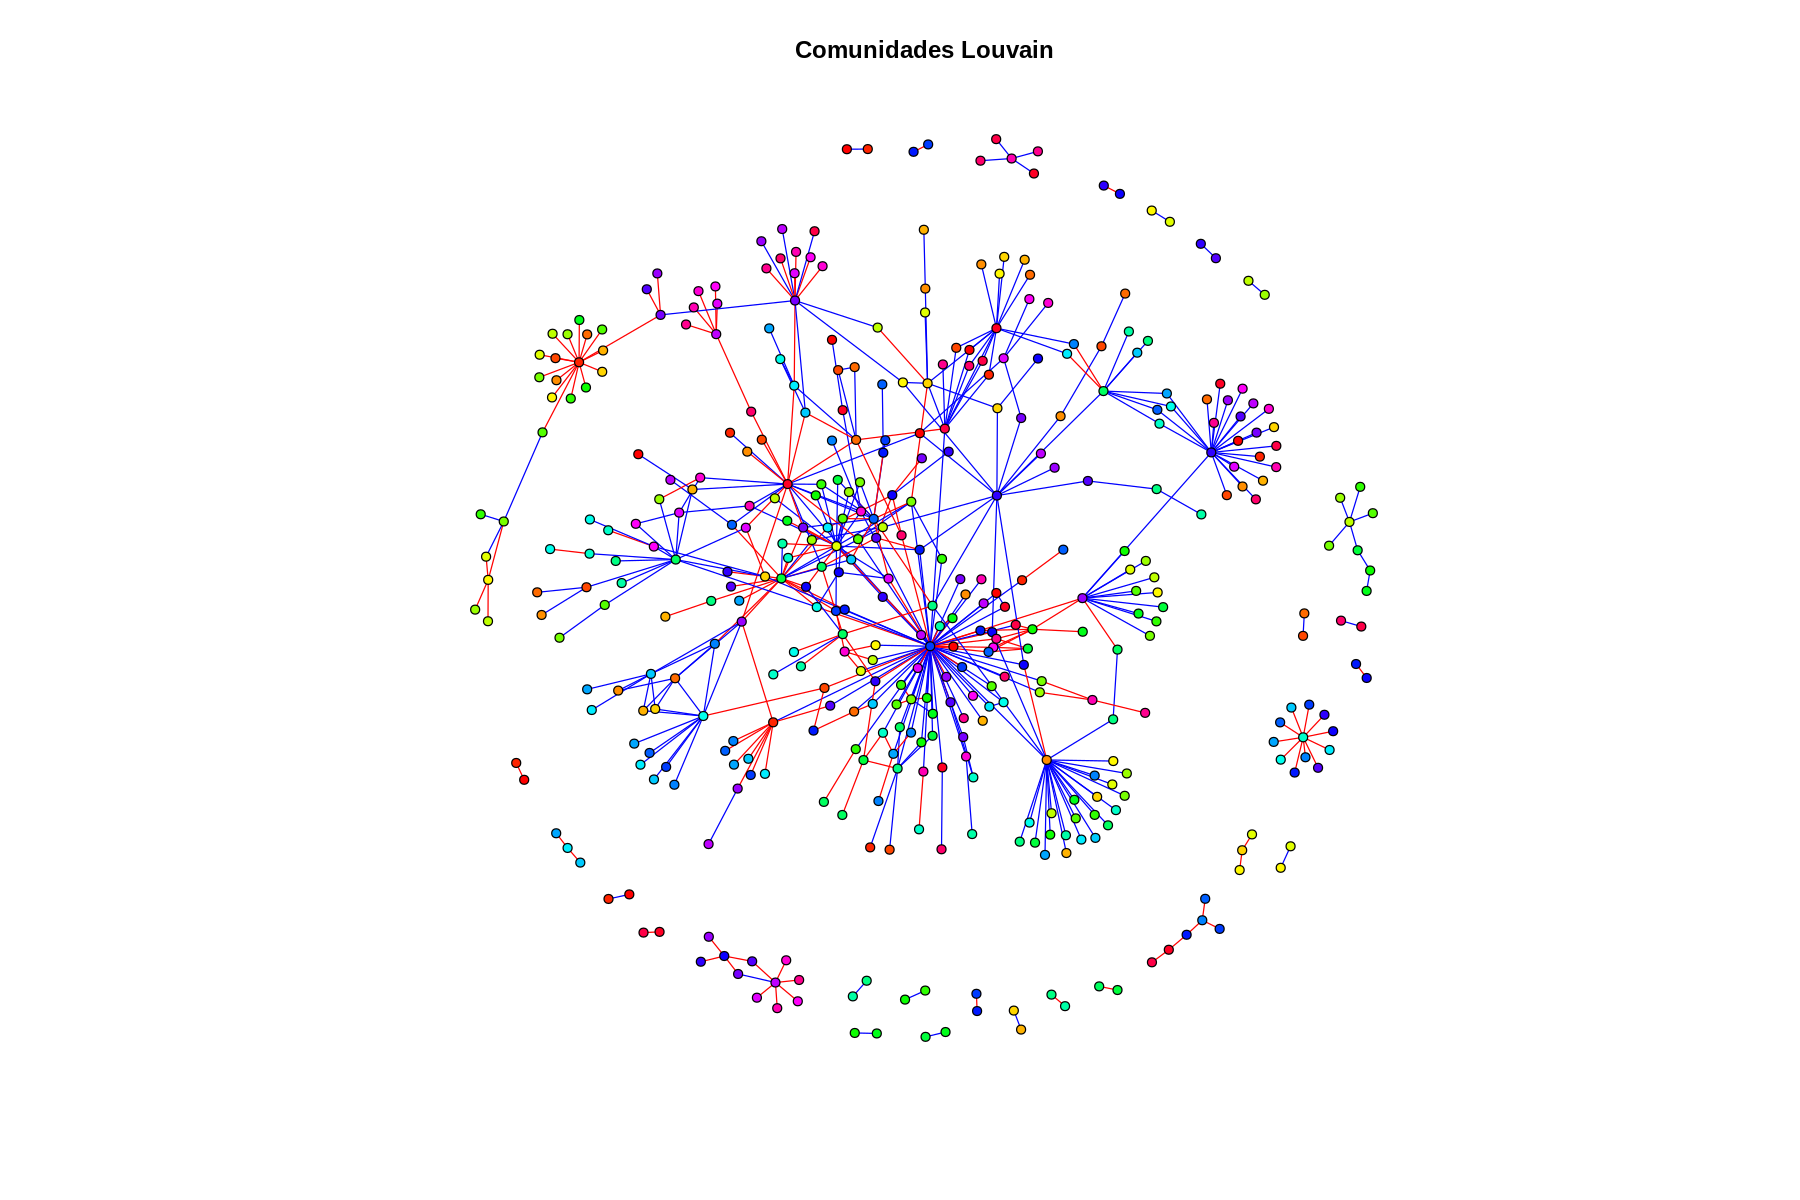

In [58]:
# Converção do grafo em um grafo não direcionado
arch_copy_undirected <- as.undirected(arch_copy)

# Aplicação do algoritmo de detecção de comunidades Louvain no grafo não direcionado
comunidades_louvain <- cluster_louvain(arch_copy_undirected)

# Atribuição das comunidades aos vértices
V(arch_copy)$comunidade <- comunidades_louvain$membership

# Tamanho das figuras (ajuste conforme necessário)
options(repr.plot.width = 15, repr.plot.height = 10)

# Plote do gráfico com cores diferentes para as comunidades
plot(arch_copy, layout = layout_with_fr(arch_copy), vertex.label = NA, main = "Comunidades Louvain", vertex.color = rainbow(length(unique(comunidades_louvain$membership))))

In [59]:
# Método de Walktrap

# Convertção do grafo em um grafo não direcionado
arch_copy_undirected <- as.undirected(arch_copy)

# Aplicação do algoritmo de detecção de comunidades Walktrap no grafo não direcionado
comunidades_walktrap <- cluster_walktrap(arch_copy_undirected)

# Avaliação da qualidade das comunidades usando a métrica de modularidade
modularidade_walktrap <- modularity(comunidades_walktrap)

# Exibição da modularidade
cat("Modularidade das Comunidades (Walktrap):", modularidade_walktrap, "\n")

Modularidade das Comunidades (Walktrap): 0.7416434 


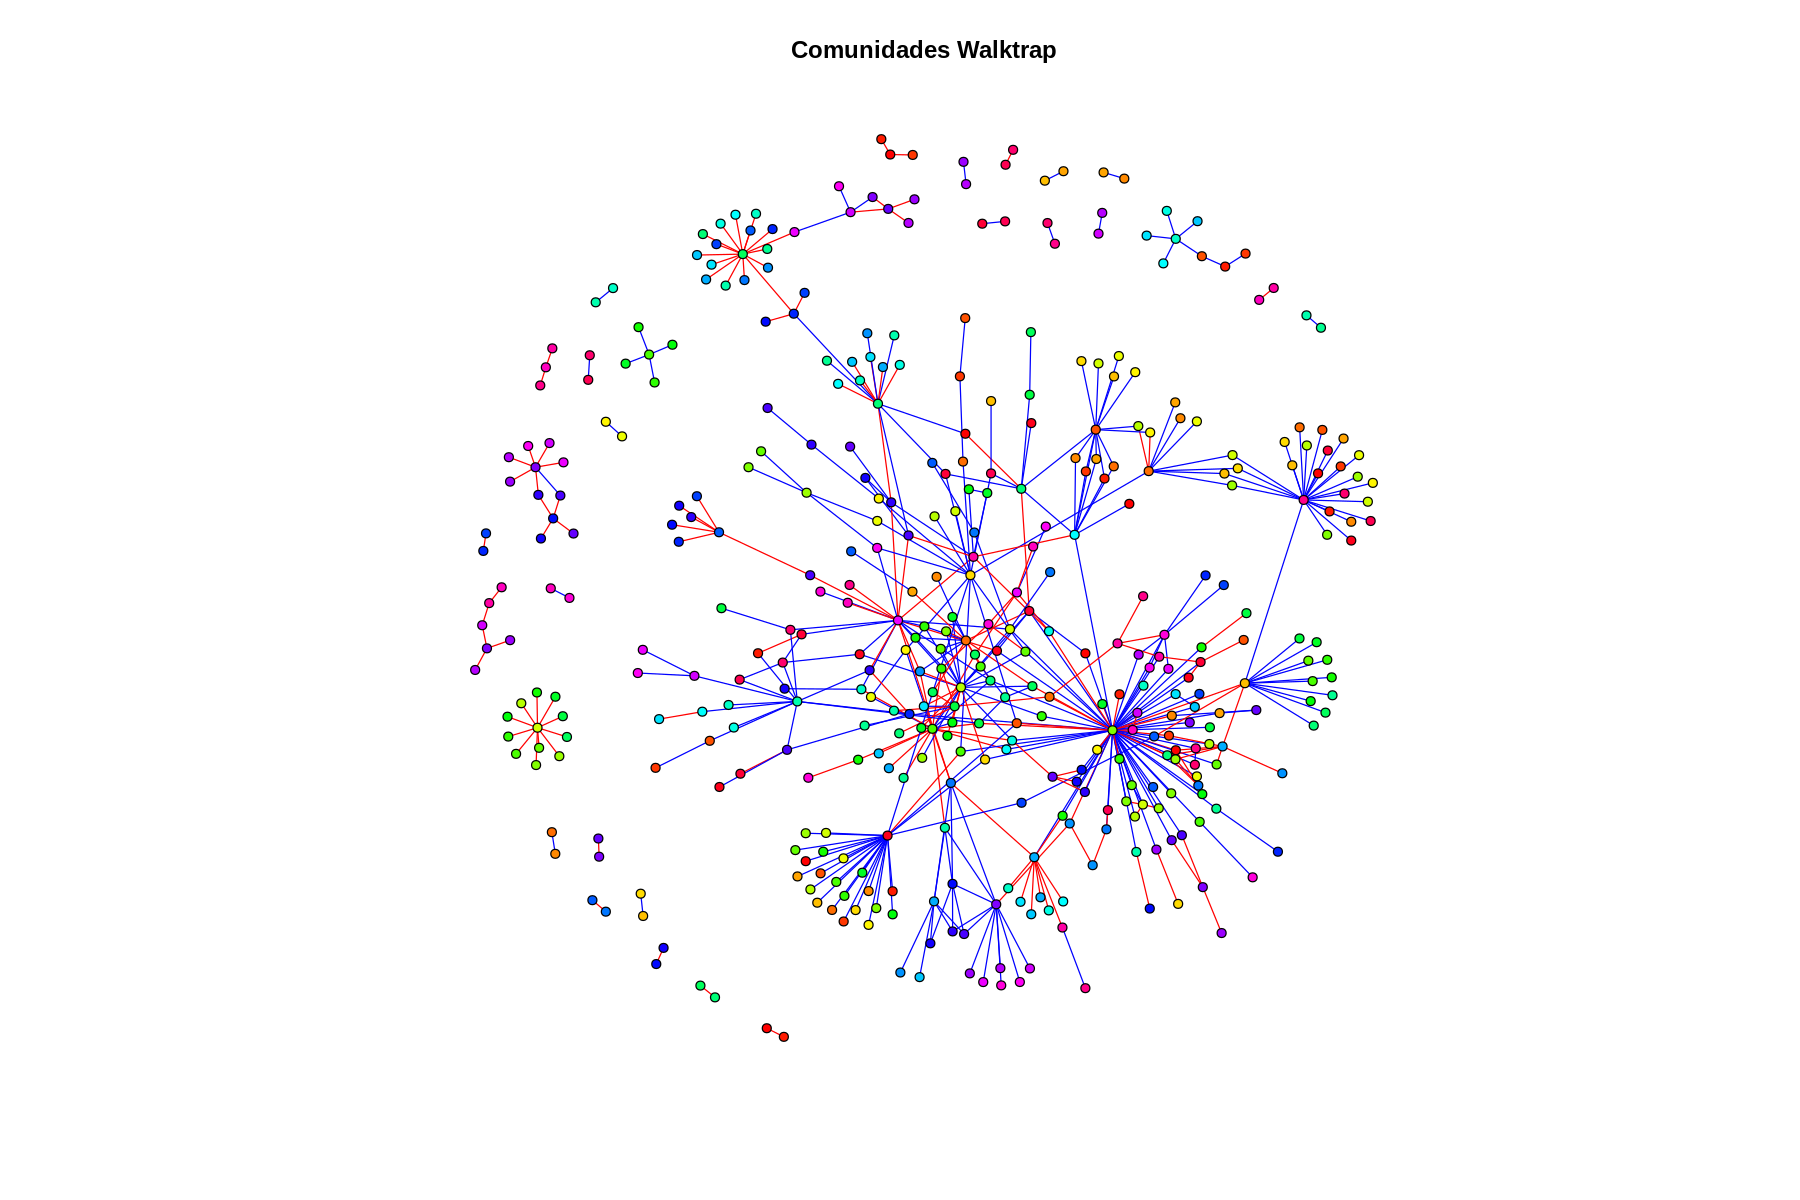

In [60]:
# Atribuição das comunidades aos vértices
V(arch_copy)$comunidade <- comunidades_walktrap$membership

# Tamanho das figuras (ajuste conforme necessário)
options(repr.plot.width = 15, repr.plot.height = 10)

# Plote do gráfico com cores diferentes para as comunidades
plot(arch_copy, layout = layout_with_fr(arch_copy), vertex.label = NA, main = "Comunidades Walktrap", vertex.color = rainbow(length(unique(comunidades_walktrap$membership))))

In [61]:
# Método Edge Betweeness

# Converção do grafo em um grafo não direcionado
arch_copy_undirected <- as.undirected(arch_copy)

# Cálculo da centralidade de betweeness das arestas
centralidade_betweeness <- edge.betweenness(arch_copy_undirected)

# Identificação das arestas com maior centralidade de betweeness para remoção
arestas_remover <- which(centralidade_betweeness == max(centralidade_betweeness))

# Remoção das arestas com maior centralidade de betweeness
arch_copy_sem_arestas <- delete_edges(arch_copy_undirected, arestas_remover)

# Aplicação do algoritmo de detecção de comunidades no grafo sem as arestas
comunidades_edge_betweeness <- cluster_fast_greedy(arch_copy_sem_arestas)

# Avaliação da qualidade das comunidades usando a métrica de modularidade
modularidade_edge_betweeness <- modularity(comunidades_edge_betweeness)

# Exibição da modularidade
cat("Modularidade das Comunidades (Edge Betweeness):", modularidade_edge_betweeness, "\n")

Modularidade das Comunidades (Edge Betweeness): 0.7721146 


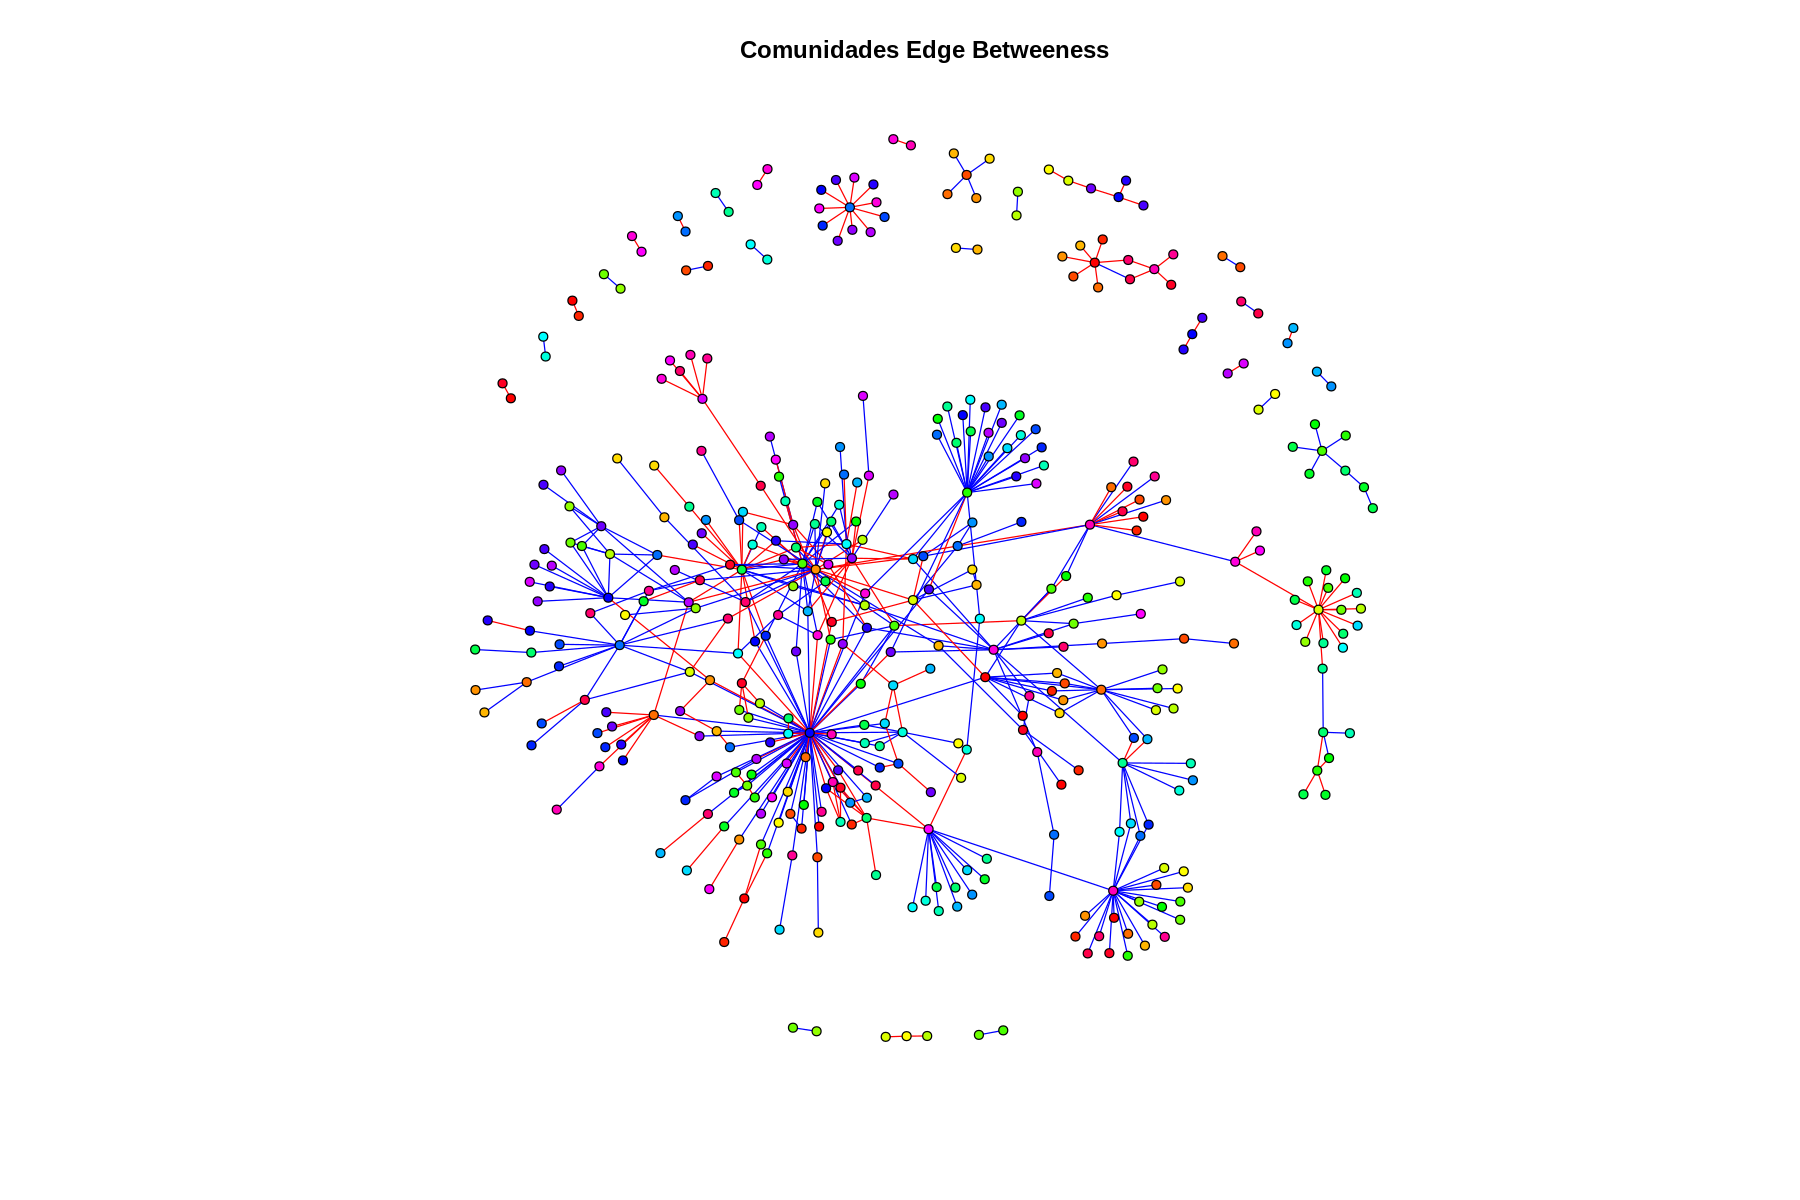

In [62]:
# Atribuição das comunidades aos vértices
V(arch_copy)$comunidade <- comunidades_edge_betweeness$membership

# Tamanho das figuras (ajuste conforme necessário)
options(repr.plot.width = 15, repr.plot.height = 10)

# Plote do gráfico com cores diferentes para as comunidades
plot(arch_copy, layout = layout_with_fr(arch_copy), vertex.label = NA, main = "Comunidades Edge Betweeness", vertex.color = rainbow(length(unique(comunidades_edge_betweeness$membership))))


In [63]:
# Com base nos resultados das métricas de modularidade para diferentes métodos de detecção de comunidades pode-se concluir que
# o método "Edge Betweeness" obteve a maior modularidade, seguido pelo método "Louvain" e, por último, o método "Walktrap".
# Portanto, o tipo de agrupamento que melhor se encaixa para a rede complexa, com base nessas métricas,
# seria o método "Edge Betweeness", pois ele produziu as comunidades com a maior modularidade.

### 5. Qual o nó mais importante e por quê?

In [64]:
# Centralidade de Grau (Degree Centrality)

# Cálculo da centralidade de grau para todos os nós
centrality_degree <- degree(arch_copy)

# Encontrar o nó com o maior grau
no_mais_importante <- which.max(centrality_degree)

# Exibição o nó mais importante e seu grau
print(paste("Nó mais importante:", V(arch_copy)$name[no_mais_importante]))
print(paste("Grau:", centrality_degree[no_mais_importante]))


[1] "Nó mais importante: cyaA"
[1] "Grau: 72"


In [65]:
# Centralidade de Próximidade (Closeness Centrality)

# Cálculo da centralidade de proximidade para todos os nós
centrality_closeness <- closeness(arch_copy, mode = "all")

# Encontrar o nó com a maior centralidade de proximidade
no_mais_importante <- which.max(centrality_closeness)

# Exibição do nó mais importante e sua centralidade de proximidade
print(paste("Nó mais importante (por proximidade):", V(arch_copy)$name[no_mais_importante]))
print(paste("Centralidade de Proximidade:", centrality_closeness[no_mais_importante]))


[1] "Nó mais importante (por proximidade): adhE"
[1] "Centralidade de Proximidade: 1"


In [66]:
#Centralidade de Intermediação (Betweenness Centrality)

# Cálculo da centralidade de intermediação para todos os nós
centrality_betweenness <- betweenness(arch_copy, directed = TRUE, normalized = TRUE)

# Encontrar o nó com a maior centralidade de intermediação
no_mais_importante_betweenness <- which.max(centrality_betweenness)

# Exibição do nó mais importante e sua centralidade de intermediação
print(paste("Nó mais importante (por intermediação):", V(arch_copy)$name[no_mais_importante_betweenness]))
print(paste("Centralidade de Intermediação:", centrality_betweenness[no_mais_importante_betweenness]))

[1] "Nó mais importante (por intermediação): cyaA"
[1] "Centralidade de Intermediação: 0.345063633892076"


In [67]:
#Centralidade de Vetor Próprio (Eigenvector Centrality)

# Cálculo da centralidade de vetor próprio para todos os nós
centrality_eigenvector <- eigen_centrality(arch_copy)$vector

# Encontrar o nó com a maior centralidade de vetor próprio
no_mais_importante_eigenvector <- which.max(centrality_eigenvector)

# Exibição do nó mais importante e sua centralidade de vetor próprio
print(paste("Nó mais importante (por vetor próprio):", V(arch_copy)$name[no_mais_importante_eigenvector]))
print(paste("Centralidade de Vetor Próprio:", centrality_eigenvector[no_mais_importante_eigenvector]))

[1] "Nó mais importante (por vetor próprio): cyaA"
[1] "Centralidade de Vetor Próprio: 1"


In [68]:
# O nó "cyaA" é o mais importante tanto pelo grau quanto pela centralidade de vetor próprio, significando tem conexões diretas com muitos outros nós e é altamente influente na rede.
# O nó "adhE" é identificado como o mais importante pela centralidade de proximidade, indicando que está geograficamente próximo de muitos outros nós na rede.
# O nó "dcuB_fumB" tem a maior centralidade de intermediação, significando que atua como uma ponte para muitos caminhos mais curtos na rede.

### 6. Qual a aresta mais importante e por quê?

In [69]:
# Centralidade de Intermediação (Betweenness Centrality)

# Calcular a centralidade de intermediação (Betweenness) das arestas
betweenness_values <- edge_betweenness(arch_copy)

# Encontrar o índice da aresta mais importante
indice_aresta_mais_importante <- which.max(betweenness_values)

# Obter informações da aresta mais importante
aresta_mais_importante <- E(arch_copy)[indice_aresta_mais_importante]

# Exibir informações da aresta mais importante com base na Centralidade de Intermediação
cat("Aresta mais importante (Centralidade de Intermediação):", aresta_mais_importante, "\n")

Aresta mais importante (Centralidade de Intermediação): 299 


### 7. Qual o diâmetro da rede?

In [70]:
# Calcular o diâmetro da rede
diametro <- diameter(arch_copy, directed = FALSE)

# Exibir o diâmetro
cat("Diâmetro da rede:", diametro, "\n")

Diâmetro da rede: 21 


### 8. Como você classificaria a rede?
    a. Aleatória, mundo pequeno, escala-livre


In [71]:
# A rede tem um diâmetro relativamente grande (21), o que sugere que não se encaixa bem no modelo de uma rede aleatória, onde o diâmetro tende a ser menor.
# Uma rede com um diâmetro relativamente grande, mas menor do que o esperado em uma rede aleatória, sugere que pode ter características de mundo pequeno.
# No entanto, o diâmetro de 21 ainda é relativamente alto para um típico mundo pequeno.
# Portanto, a classificação mais apropriada seria "Escala-livre", uma vez que redes escalares livres frequentemente exibem um diâmetro maior devido à presença
# de nós altamente conectados (hubs) e uma distribuição de grau que segue uma lei de potência.


### 9. Há alguma informação subjacente (indireta em relação às métricas) que você vislumbrou na rede?

In [72]:
# Comunidades Identificadas: Mostrou a presença de agrupamentos de genes ou proteínas que interagem mais frequentemente entre si do que com outros nós da rede.
# Centralidade de Nós Importantes: A identificação de nós importantes com alta centralidade, como o "cyaA," sugere que esses nós desempenham um papel crítico na rede,
# possivelmente atuando como reguladores ou genes-chave em processos biológicos.
# Modelo de Crescimento: O diâmetro da rede e a análise de classificação sugerem que ela pode seguir um modelo de crescimento de rede em escala-livre.
# Isso significa que alguns nós têm um grande número de conexões, enquanto a maioria dos nós tem poucas conexões. Essa estrutura é típica de redes biológicas e sociais.
# Modularidade: A análise da modularidade mostra como a rede se divide em comunidades ou módulos.
# Caminhos Mínimos: A análise dos caminhos mínimos pode revelar quais genes ou proteínas estão mais próximos em termos de interações.